<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 4
%autosave 120


Autosaving every 120 seconds


In [2]:
from fastai.io import *
from fastai.structured import *
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from pandas_summary import DataFrameSummary
from IPython.display import display
from sklearn import metrics
import feather
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, RepeatedKFold
from sklearn.metrics import mean_squared_error
import warnings
import gc

In [3]:
PATH = './'

In [4]:
!ls

'Blend with df outliers.ipynb'
'Blending submissions.ipynb'
'Combining model without outlier.ipynb'
'Continuous data processing.ipynb'
'DL on cont data-Copy1.ipynb'
'DL on cont data.ipynb'
'Elo - ML model - 3.690.ipynb'
'Elo - ML model - 3.693.ipynb'
'Elo - ML model - 3.695 beta.ipynb'
'Elo - ML model - 3.695.ipynb'
'Elo - ML model - 3.696.ipynb'
'Elo - ML model - alpha.ipynb'
'Elo - ML model - cat aggregates.ipynb'
'Elo - ML model 3.691 beta new.ipynb'
'Elo - ML model 3.691.ipynb'
'Elo - ML model clean.ipynb'
'Elo - ML model proc_df.ipynb'
'Elo - ML model-RF copy.ipynb'
'Elo - ML model-backup.ipynb'
'Elo - ML model-new.ipynb'
'Elo RF- New.ipynb'
'Elo RF.ipynb'
'Elo end 2 end.ipynb'
'Elo feature engineering - 3.691 - beta.ipynb'
'Elo feature engineering - 3.691.ipynb'
'Elo feature engineering - 3.696.ipynb'
'Elo feature engineering 3.690.ipynb'
'Elo feature engineering 3.693 .ipynb'
'Elo feature engineering 3.695 beta.ipynb'
'Elo feature engineering 3.695.ipynb'
'Elo feature engineerin

In [ ]:
'combined_submission-2019-02-26 22:47:23.452323.csv' - 3.684
'dl_xgb_submission_stacked_lgb-2019-02-26 22:45:24.597929.csv' - 3.687
'combined_submission-2019-02-22 21:40:05.269919.csv' - 3.685
'dl_submission_stacked_lgb-2019-02-22 21:37:59.515079.csv' - 3.685
'dl_submission-2019-02-22 21:30:24.851272.csv' - 3.745
'outlier_combining_submission-2019-02-19 02:48:44.830259.csv'- 3.690
'outlier_combining_submission-2019-02-19 02:28:13.811057.csv' - 3.689
'submission-2019-02-19 00:51:48.972772.csv' - 3.717
'blend_kfol_st.csv' - 3.693
'submission-2019-02-13 22:48:45.005871.csv' - 3.691
'submission-2019-01-12 13:53:27.215115.csv'- 3.696
'submission-2019-01-17 23:23:57.743505.csv' - 3.696
'submission-2019-01-20 19:35:24.892043.csv' - 3.695
'chandu_mean1.csv' - 3.694
'submission-2019-02-02 23:13:59.670630.csv' - 3.693
'submission-2019-02-13 00:42:12.274968.csv' - 3.692
'submission_kfold-2019-02-13 00:55:25.132146.csv' - 3.692
'submission-2019-02-15 14:22:06.881490.csv' - 3.695
'outlier_combining_submission-2019-02-19 02:12:16.662625.csv' - 3.689
'combined_submission-2019-02-20 00:21:17.597315.csv'- 3.686
'xg_submission_stacked_lgb-2019-02-21 13:41:48.181414.csv' - 3.688
'combined_submission-2019-02-21 13:55:21.772806.csv' - 3.684
'combined_submission-2019-02-22 20:49:55.088273.csv' - 3.684


In [74]:
df_3_684_452323 = pd.read_csv('combined_submission-2019-02-26 22:47:23.452323.csv', names=['card_id', 'df_3_684_452323'], skiprows=[0], header=None) 
df_3_687_597929 = pd.read_csv('dl_xgb_submission_stacked_lgb-2019-02-26 22:45:24.597929.csv', names=['card_id', 'df_3_687_597929'], skiprows=[0], header=None) 
df_3_685_269919 = pd.read_csv('combined_submission-2019-02-22 21:40:05.269919.csv', names=['card_id', 'df_3_685_269919'], skiprows=[0], header=None) 
df_3_685_515079 = pd.read_csv('dl_submission_stacked_lgb-2019-02-22 21:37:59.515079.csv', names=['card_id', 'df_3_685_515079'], skiprows=[0], header=None) 
df_3_745_851272 = pd.read_csv('dl_submission-2019-02-22 21:30:24.851272.csv', names=['card_id', 'df_3_745_851272'], skiprows=[0], header=None) 
df_3_690_830259 = pd.read_csv('outlier_combining_submission-2019-02-19 02:48:44.830259.csv', names=['card_id', '3_690_830259'], skiprows=[0], header=None)
df_3_689_811057 = pd.read_csv('outlier_combining_submission-2019-02-19 02:28:13.811057.csv', names=['card_id', 'df_3_689_811057'], skiprows=[0], header=None) 
df_3_717_972772 = pd.read_csv('submission-2019-02-19 00:51:48.972772.csv', names=['card_id', 'df_3_717_972772'], skiprows=[0], header=None) 
df_3_693_blend_kfol_st = pd.read_csv('blend_kfol_st.csv', names=['card_id', 'df_3_693_blend_kfol_st'], skiprows=[0], header=None) 
df_3_691_005871 = pd.read_csv('submission-2019-02-13 22:48:45.005871.csv', names=['card_id', 'df_3_691_005871'], skiprows=[0], header=None) 
df_3_696_215115 = pd.read_csv('submission-2019-01-12 13:53:27.215115.csv', names=['card_id', '3_696_215115'], skiprows=[0], header=None)
df_3_696_743505 = pd.read_csv('submission-2019-01-17 23:23:57.743505.csv', names=['card_id', 'df_3_696_743505'], skiprows=[0], header=None) 
df_3_695_892043 = pd.read_csv('submission-2019-01-20 19:35:24.892043.csv', names=['card_id', 'df_3_695_892043'], skiprows=[0], header=None) 
df_3_694_chandu_mean1 = pd.read_csv('chandu_mean1.csv', names=['card_id', 'df_3_694_chandu_mean1'], skiprows=[0], header=None) 
df_3_693_670630 = pd.read_csv('submission-2019-02-02 23:13:59.670630.csv', names=['card_id', 'df_3_693_670630'], skiprows=[0], header=None) 
df_3_692_274968 = pd.read_csv('submission-2019-02-13 00:42:12.274968.csv', names=['card_id', 'df_3_692_274968'], skiprows=[0], header=None) 
df_3_692_132146 = pd.read_csv('submission_kfold-2019-02-13 00:55:25.132146.csv', names=['card_id', 'df_3_692_132146'], skiprows=[0], header=None) 
df_3_695_881490 = pd.read_csv('submission-2019-02-15 14:22:06.881490.csv', names=['card_id', 'df_3_695_881490'], skiprows=[0], header=None) 
df_3_689_662625 = pd.read_csv('outlier_combining_submission-2019-02-19 02:12:16.662625.csv', names=['card_id', 'df_3_689_662625'], skiprows=[0], header=None) 
df_3_686_597315 = pd.read_csv('combined_submission-2019-02-20 00:21:17.597315.csv', names=['card_id', '3_686_597315'], skiprows=[0], header=None)
df_3_688_181414 = pd.read_csv('xg_submission_stacked_lgb-2019-02-21 13:41:48.181414.csv', names=['card_id', 'df_3_688_181414'], skiprows=[0], header=None) 
df_3_684_772806 = pd.read_csv('combined_submission-2019-02-21 13:55:21.772806.csv', names=['card_id', 'df_3_684_772806'], skiprows=[0], header=None) 
df_3_684_088273 = pd.read_csv('combined_submission-2019-02-22 20:49:55.088273.csv', names=['card_id', 'df_3_684_088273'], skiprows=[0], header=None) 


In [94]:
df_base = df_3_684_088273

In [95]:
df_base = pd.merge(df_base, df_3_684_452323, how='inner', on='card_id')
df_base = pd.merge(df_base, df_3_687_597929, how='inner', on='card_id')
df_base = pd.merge(df_base, df_3_685_269919, how='inner', on='card_id')
df_base = pd.merge(df_base, df_3_685_515079, how='inner', on='card_id')
# df_base = pd.merge(df_base, df_3_745_851272, how='inner', on='card_id')
df_base = pd.merge(df_base, df_3_690_830259, how='inner', on='card_id')
df_base = pd.merge(df_base, df_3_689_811057, how='inner', on='card_id')
# df_base = pd.merge(df_base, df_3_717_972772, how='inner', on='card_id')
df_base = pd.merge(df_base, df_3_693_blend_kfol_st, how='inner', on='card_id')
df_base = pd.merge(df_base, df_3_691_005871, how='inner', on='card_id')
# df_base = pd.merge(df_base, df_3_696_215115, how='inner', on='card_id')
# df_base = pd.merge(df_base, df_3_696_743505, how='inner', on='card_id')
df_base = pd.merge(df_base, df_3_695_892043, how='inner', on='card_id')
df_base = pd.merge(df_base, df_3_694_chandu_mean1, how='inner', on='card_id')
df_base = pd.merge(df_base, df_3_693_670630, how='inner', on='card_id')
df_base = pd.merge(df_base, df_3_692_274968, how='inner', on='card_id')
df_base = pd.merge(df_base, df_3_692_132146, how='inner', on='card_id')
df_base = pd.merge(df_base, df_3_695_881490, how='inner', on='card_id')
df_base = pd.merge(df_base, df_3_689_662625, how='inner', on='card_id')
df_base = pd.merge(df_base, df_3_686_597315, how='inner', on='card_id')
df_base = pd.merge(df_base, df_3_688_181414, how='inner', on='card_id')
df_base = pd.merge(df_base, df_3_684_772806, how='inner', on='card_id')

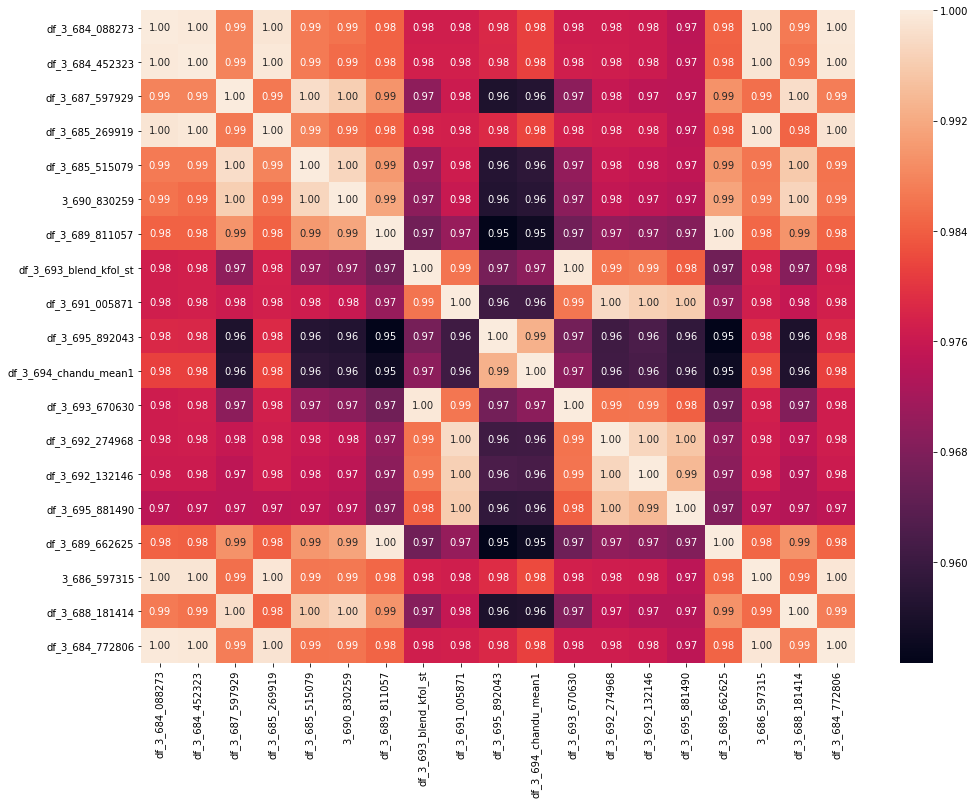

In [96]:
plt.figure(figsize=(16,12))
sns.heatmap(df_base.iloc[:,1:].corr(),annot=True,fmt=".2f")

In [97]:
M = np.zeros([df_base.iloc[:,1:].shape[1],df_base.iloc[:,1:].shape[1]])
for i in np.arange(M.shape[1]):
    for j in np.arange(M.shape[1]):
        M[i,j] = np.sqrt(metrics.mean_squared_error(df_base.iloc[:,i+1], df_base.iloc[:,j+1]))

In [98]:
df_base['target'] = df_base.iloc[:,1:].mean(axis=1)

In [99]:
gc.collect()

36

In [90]:
# df_base['target'] = df_3_745_851272['df_3_745_851272']* 0.1 + df_base['target'] * 0.9

In [100]:
df_base[['card_id','target']].to_csv("mean_of_all_final.csv",index=False)

In [101]:
!kaggle competitions submit elo-merchant-category-recommendation -f 'mean_of_all_final.csv' -m "blending top 14 submissions"

100%|#######################################| 4.24M/4.24M [00:22<00:00, 197kB/s]
Successfully submitted to Elo Merchant Category Recommendation

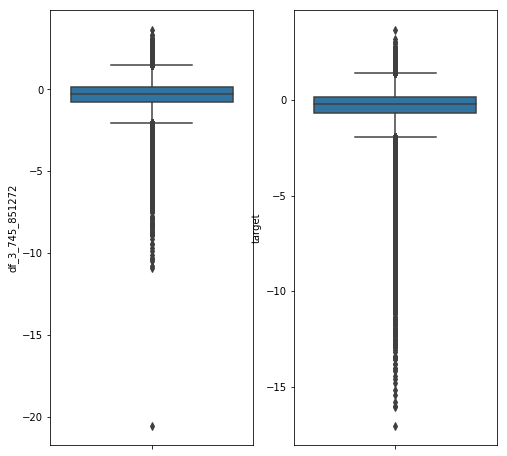

In [41]:
df_base['target'] = df_3_745_851272['df_3_745_851272']* 0.1 + df_base['target'] * 0.9

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
sns.boxplot(df_3_745_851272['df_3_745_851272'],orient='v')

plt.subplot(1, 2, 2)
sns.boxplot(df_base['target'], orient='v')
plt.show()
# df_base[['card_id','target']].to_csv("blend3.csv",index=False)

In [42]:
from scipy.stats import truncnorm


In [43]:
df_base.shape, df_3_684_088273.shape

((123623, 25), (123623, 2))

In [45]:
df_base.head()

,card_id,df_3_684_088273,df_3_684_452323,df_3_687_597929,df_3_685_269919,df_3_685_515079,df_3_745_851272,3_690_830259,df_3_689_811057,df_3_717_972772,...,df_3_694_chandu_mean1,df_3_693_670630,df_3_692_274968,df_3_692_132146,df_3_695_881490,df_3_689_662625,3_686_597315,df_3_688_181414,df_3_684_772806,target
0,C_ID_0ab67a22ab,-2.302681,-2.312583,-2.122841,-2.415547,-2.328769,-1.867310,-2.427491,-2.427491,-2.272456,...,-2.840921,-3.072875,-3.234466,-3.168636,-3.407407,-2.427491,-2.464909,-2.147446,-2.324886,-2.534741
1,C_ID_130fd0cbdd,-0.314882,-0.326738,-0.286171,-0.338663,-0.310020,-0.530126,-0.324981,-0.254059,-0.376396,...,-0.310089,-0.348145,-0.246711,-0.269033,-0.274402,-0.254059,-0.346143,-0.292596,-0.329951,-0.333404
2,C_ID_b709037bc5,-0.838809,-0.844756,-0.889205,-0.859591,-0.918874,-0.851647,-0.930830,-0.367841,-1.300530,...,-1.057735,-0.949767,-0.888107,-1.012365,-0.954982,-0.367841,-0.865569,-0.912420,-0.856364,-0.890216
3,C_ID_d27d835a9f,-0.090521,-0.084800,-0.060729,-0.087357,-0.065844,-0.074054,-0.082940,-0.089059,-0.333307,...,-0.132511,-0.149493,-0.129507,-0.117934,-0.159088,-0.089059,-0.095905,-0.077765,-0.093318,-0.114255
4,C_ID_2b5e3df5c2,-1.417952,-1.420726,-1.781597,-1.452571,-1.845287,-1.433802,-1.934582,-1.337903,-1.790302,...,-1.248852,-1.212316,-1.695469,-1.500328,-1.796945,-1.337903,-1.497219,-1.832296,-1.446076,-1.501269


In [46]:
df_base1 = df_base[['card_id', 'target']]

In [48]:
df_base1.shape, df_3_684_088273.shape

((123623, 2), (123623, 2))

In [49]:
truncnorm.mean()

11.315821326743784

In [57]:
df_3_687_597929['df_3_687_597929'].head()

0   -2.122841
1   -0.286171
2   -0.889205
3   -0.060729
4   -1.781597
Name: df_3_687_597929, dtype: float64

In [60]:
len(df_3_684_088273['df_3_684_088273'].values.tolist())

123623

In [61]:
len(df_3_687_597929['df_3_687_597929'].values.tolist())

123623

In [59]:
truncnorm.mean(df_3_684_088273['df_3_684_088273'].values.tolist(), df_3_687_597929['df_3_687_597929'].values.tolist())

ValueError: operands could not be broadcast together with shapes (49494,) (123623,) 

In [47]:
df_base3['target'] = truncnorm.mean(df_3_684_088273['df_3_684_088273'],df_base1['target'])

/home/chandrasekhar/anaconda3/envs/fastai/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:6348: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


ValueError: operands could not be broadcast together with shapes (37950,) (123623,) 

In [31]:
df_base[['card_id','target']].to_csv("blend3_truncnorm.csv",index=False)